N=100, final loss=0.191 um
N=300, final loss=0.234 um
N=500, final loss=0.279 um
N=700, final loss=1.100 um
N=900, final loss=1.700 um
N=1100, final loss=2.100 um
N=1300, final loss=2.452 um
N=1500, final loss=2.734 um


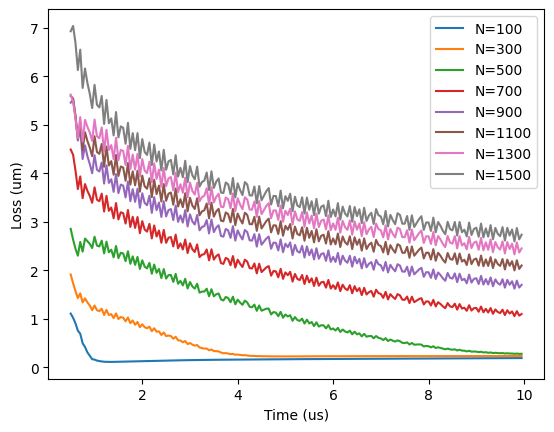

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# N_ls = [100, 500, 1000]
N_ls = [100, 300, 500,700, 900, 1100, 1300, 1500]

for N in N_ls:
    data = np.load('../data_cache/2D/loss_%d.npy'%N, allow_pickle=True)
    tls, loss = data[:, 10:]
    print('N=%d, final loss=%.3f um'%(N, loss[-1]))
    plt.plot(tls, loss, label='N=%d'%N)
plt.xlabel('Time (us)')
plt.ylabel('Loss (um)')
# plt.ylim(0, 10)
plt.legend()
plt.show()



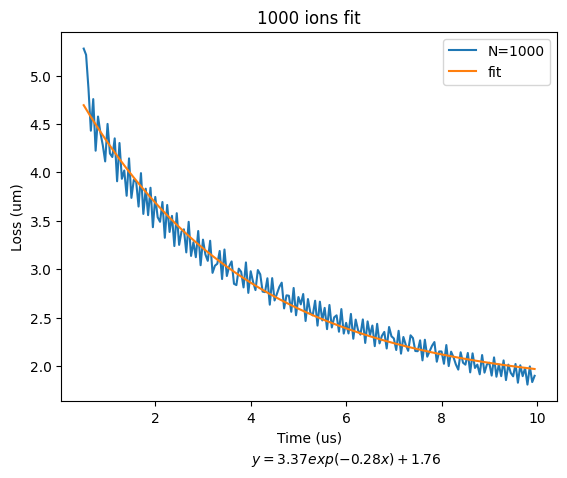

tau=1/b=3.57 us


In [42]:
from scipy.optimize import curve_fit

tls, loss_1000 = np.load('../data_cache/2D/loss_1000.npy', allow_pickle=True)[:, 10:]
def func(t, a, b, c):
    return a * np.exp(-b*t) + c

popt, pcov = curve_fit(func, tls, loss_1000, p0=(30, 1, 3))

plt.plot(tls, loss_1000, label='N=1000')
plt.plot(tls, func(tls, *popt), label='fit')
plt.xlabel('Time (us)')
plt.ylabel('Loss (um)')
plt.title("1000 ions fit")
plt.text(4, 1, '$y=%.2fexp(-%.2fx)+%.2f$'%(popt[0], popt[1], popt[2]))
plt.legend()
plt.show()
print("tau=1/b=%.2f us"%(1/popt[1]))

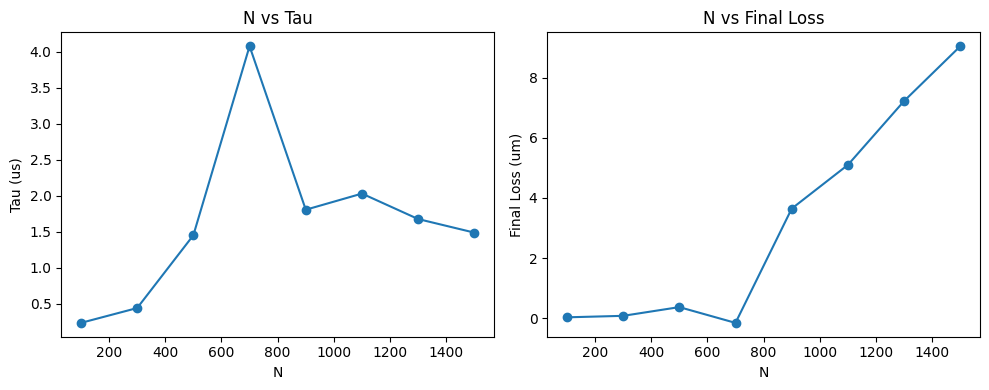

In [38]:
N_ls = [100, 300, 500,700, 900, 1100, 1300, 1500]
tau_ls = []
vf = []
for N in N_ls:
    data = np.load('../data_cache/2D/loss_%d.npy'%N, allow_pickle=True)
    tls, loss = data[:, 10:]
    popt, pcov = curve_fit(func, tls, loss)
    tau_ls.append(1/popt[1])
    vf.append(popt[2])
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(N_ls, tau_ls, 'o-')
ax[0].set_xlabel('N')
ax[0].set_ylabel('Tau (us)')
ax[0].set_title('N vs Tau')
ax[1].plot(N_ls, vf, 'o-')
ax[1].set_xlabel('N')
ax[1].set_ylabel('Final Loss (um)')
ax[1].set_title('N vs Final Loss')
plt.tight_layout()
plt.show()
# plt.plot(N_ls, tau_ls)
# plt.xlabel('N')
# plt.ylabel('Tau (us)')
# plt.title('N vs Tau')
# plt.show()

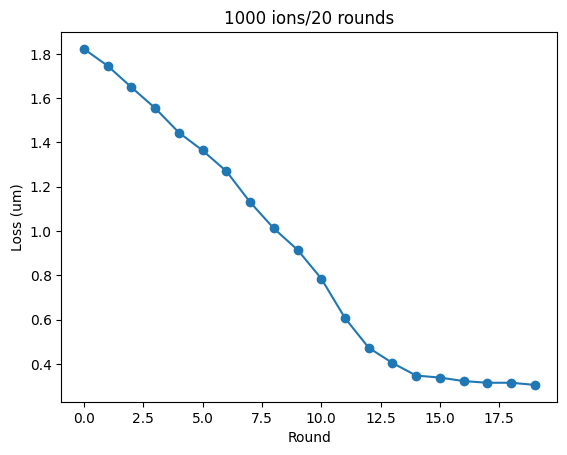

Final Loss = 0.305 um


In [49]:
L_ls = [1.8219787299008905,  1.7454244415169946,  1.6488575057617174,  1.5545123786896269, 1.4442915868944701,
         1.363312221120079, 1.2699093859271173, 1.1303148033456591, 1.0114487542785922, 0.9148610057105615,
         0.7850382095708937,  0.606614554183438, 0.47244656574700405,  0.40386335765154685,  0.3469949271991171,
         0.33797462917744064,  0.32216843213663526, 0.3145422689098484,  0.314641195722814,  0.3047929738728221]
rounds = np.arange(len(L_ls))
plt.plot(rounds, L_ls, 'o-')
plt.xlabel('Round')
plt.ylabel('Loss (um)')
plt.title("1000 ions/20 rounds")
plt.show()
print("Final Loss = %.3f um"%(L_ls[-1]))

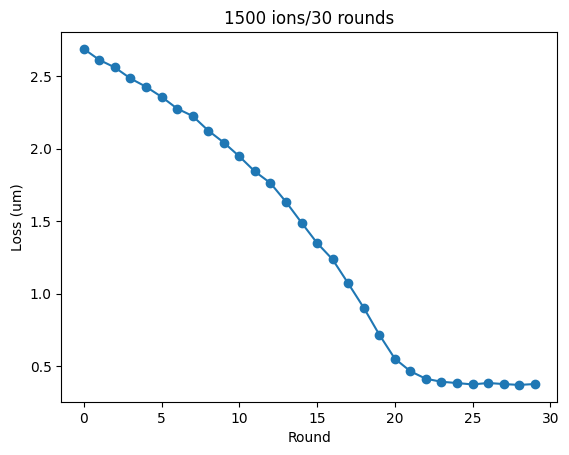

Final Loss = 0.378 um


In [50]:
L_ls = [2.687623843155168, 2.6117036522557306,  2.5596292373647964, 2.4839937774320364, 2.4268842038115688,
        2.357421990203846, 2.276502821547847, 2.2251589314040157,  2.1249823315623577, 2.0424168633315456,
        1.9471885161433837,  1.8428747049687784, 1.763211471750607,  1.6336567611981796,  1.4901856523131858,
        1.350216873686068,  1.2366117117682203,  1.0720641789511653, 0.9042313908681565, 0.7186347613127857]
L_ls += np.load("../data_cache/iter1500/UL20-30.npy")[:, -1].tolist()
rounds = np.arange(len(L_ls))
plt.plot(rounds, L_ls, 'o-')
plt.xlabel('Round')
plt.ylabel('Loss (um)')
plt.title("1500 ions/%d rounds"%(len(L_ls)))
plt.show()
print("Final Loss = %.3f um"%(L_ls[-1]))

[2.32037922 2.41948922 2.42071477 2.47889335 2.42171945 2.50173514
 2.64734762 2.75867685 2.80268641 2.85532031 3.0583581  3.03074314
 3.13609076 3.36540805 3.43594752 3.71911393 3.93266343 3.99064392
 4.03336915 4.04852359 4.25727937 3.63571966 2.97503806 2.11795413
 1.67686253 1.41068377 1.25723429 1.08227238 0.67997497 0.89387963]


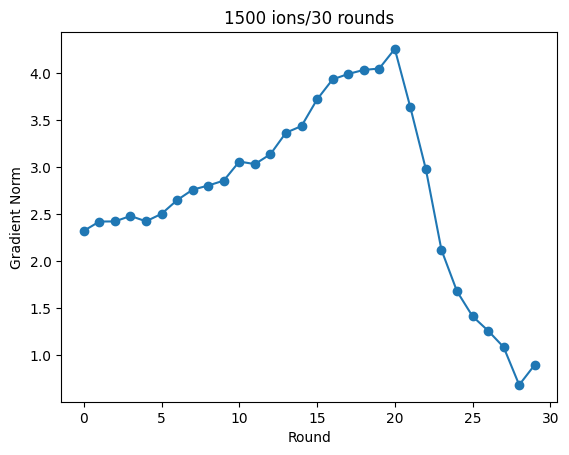

In [59]:
UL30 = np.load("../data_cache/iter1500/grad_L30.npy")
grad = np.linalg.norm(UL30, axis=1)
print(grad)
rounds = np.arange(len(grad))
plt.plot(rounds, grad, 'o-')
plt.xlabel('Round')
plt.ylabel('Gradient Norm')
plt.title("1500 ions/30 rounds")
plt.show()


In [61]:
import numpy as np

def info_loader(filename):
    '''
    FIle format as iter1500/30rounds_info.txt
    '''

    line_num = sum(1 for _ in open(filename))

    # Get round id
    round_id = np.zeros(line_num, dtype=int)
    with open(filename, "r") as f:
        i = 0
        for line in f:
            str_list = line.strip().split(',')
            round_id[i] = int(str_list[0].strip()[6:])
            i += 1

    # Get U
    U = np.zeros((line_num, 5))
    with open(filename, "r") as f:
        i = 0
        for line in f:
            str_list = line.strip().split(',')
            flt_list = str_list[1].strip()[5:-1].split(' ')
            U[i] = np.array([float(flt_list[fid]) for fid in range(len(flt_list)) if flt_list[fid] != ''])
            i+=1

    # Get L
    L = np.zeros(line_num)
    with open(filename, "r") as f:
        i = 0
        for line in f:
            str_list = line.strip().split(',')
            flt_L = float(str_list[2].strip()[4:])
            L[i] = flt_L
            i+=1

    # Combine U and L
    # UL = np.hstack((U, L.reshape(-1,1)))

    # Get grad_L
    grad_L = np.zeros((line_num, 5))
    with open(filename, "r") as f:
        i = 0
        for line in f:
            str_list = line.strip().split(',')
            flt_grad = str_list[3].strip()[11:-1].split(' ')
            grad_L[i] = np.array([float(flt_grad[fid]) for fid in range(len(flt_grad)) if flt_grad[fid] != ''])
            i+=1

    return U, L, grad_L

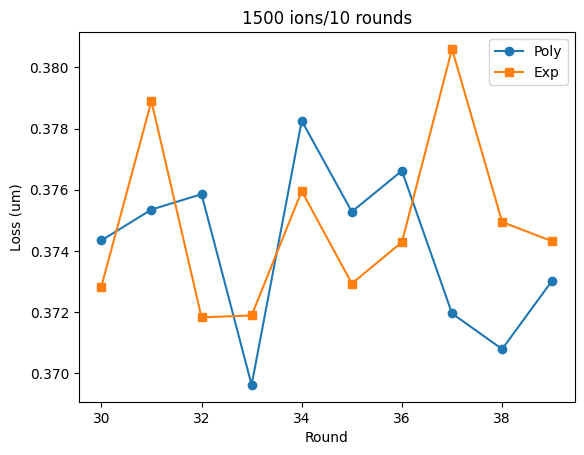

In [63]:
L_poly = info_loader("../data_cache/iter1500/30-40round_rl_poly.txt")[1]
L_exp = info_loader("../data_cache/iter1500/30-40round_rl_exp.txt")[1]
rounds = np.arange(30, 40)
plt.plot(rounds, L_poly, 'o-', rounds, L_exp, 's-')
plt.xlabel('Round')
plt.ylabel('Loss (um)')
plt.title("1500 ions/10 rounds")
plt.legend(['Poly', 'Exp'])
plt.show()

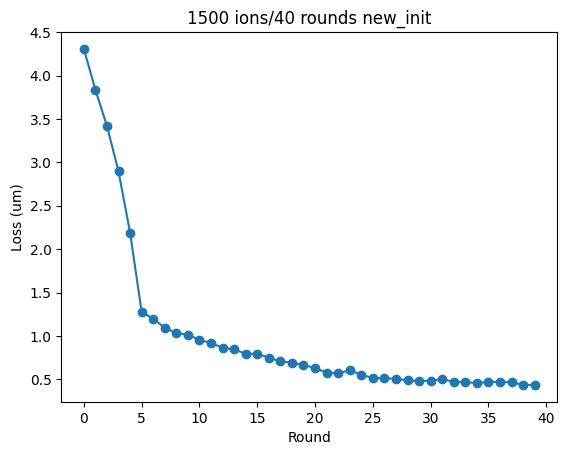

In [ ]:
L = info_loader("../data_cache/iter1500/40round_newinit.txt")[1]
rounds = np.arange(len(L))
plt.plot(rounds, L, 'o-')
plt.xlabel('Round')
plt.ylabel('Loss (um)')
plt.title("1500 ions/40 rounds new_init")
plt.show()